# 1. Get the primary key of the table at hand.

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive/')
path = '/content/drive/My Drive/BADM 576/Extra Credit/Retail transactions/'

df = pd.read_csv(path+"Sales_Transaction.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
df.head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom
7,581475,12/9/2019,22119,Peace Wooden Block Letters,12.25,12,13069.0,United Kingdom
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,10.65,12,13069.0,United Kingdom
9,581475,12/9/2019,22216,T-Light Holder White Lace,10.55,24,13069.0,United Kingdom


We can tell that **(TransactionNo, ProductNo)** is the primary key for they identify a row together.

# 2. Consider Quantity as the Target column.
Identify the type of machine learning problem at hand

Since the quantity is represented as a discrete number, the problem can be classified as a **regression** problem.

# 3. Comment on the distribution of the Target column. 
Will it affect your final goal of predicting the Target column adversely? Are there outliners for this column?

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

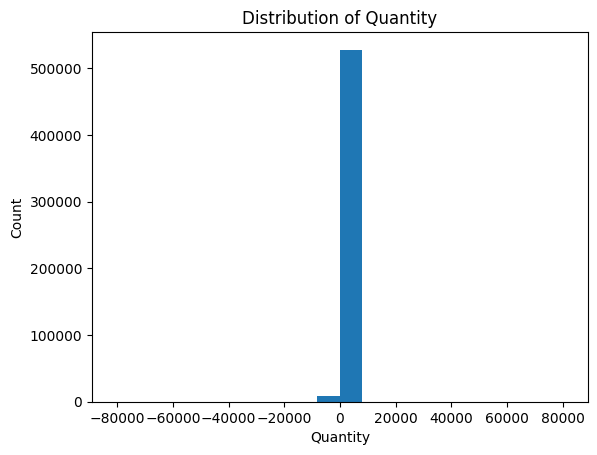

In [4]:
plt.hist(df['Quantity'], bins=20)
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Distribution of Quantity')
plt.show()

The histogram reveals the presence of outliers on both the negative and positive ends of the distribution, with the majority of values falling within the range of 0 to 5000. It's worth noting that negative values in the dataset indicate items that were purchased from a supplier.

In [5]:
# All negative values
df[df['Quantity']<-0]["Quantity"].count()/df.shape[0]*100

1.600633914421553

In [6]:
# All positive values that are more than 5000
df[df['Quantity']>100]["Quantity"].count()/df.shape[0]*100

0.9040738323855692

As the percentages of negative values and positive values greater than 30 are both less than 2%, we can take a look of the distribution of values whithin (0, 30).

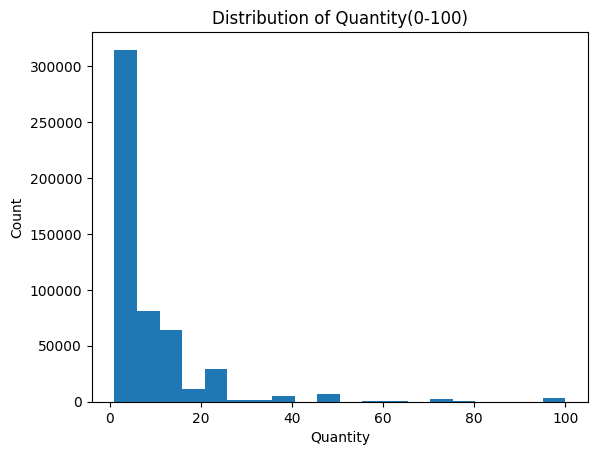

In [7]:
plt.hist(df[(df['Quantity'] >= 0) & (df['Quantity'] <= 100)]['Quantity'], bins=20)
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Distribution of Quantity(0-100)')
plt.show()

# 4. Generate datetime features
 - day, month and year - from the ‘Date’ column.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [9]:
# convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# extract day, month, and year features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# drop the original 'Date' column
df = df.drop('Date', axis=1)

In [10]:
df.head()

,TransactionNo,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Day,Month,Year
0,581482,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,9,12,2019
1,581475,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,9,12,2019
2,581475,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,9,12,2019
3,581475,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,9,12,2019
4,581475,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,9,12,2019


# 5. Check the correlation between price and quantity numerical features. 
Comment on the correlation.


In [11]:
df[['Price', 'Quantity']].corr()

,Price,Quantity
Price,1.000000,-0.007182
Quantity,-0.007182,1.000000


The price and quantity are negative correlated.

# 6. Generate histograms for price and comment on whether it seem Gaussian, or have severe skews. 
Visualise the relationship between this numeric variables and the target variable. Also, comment on the presence of outliers on this variable.


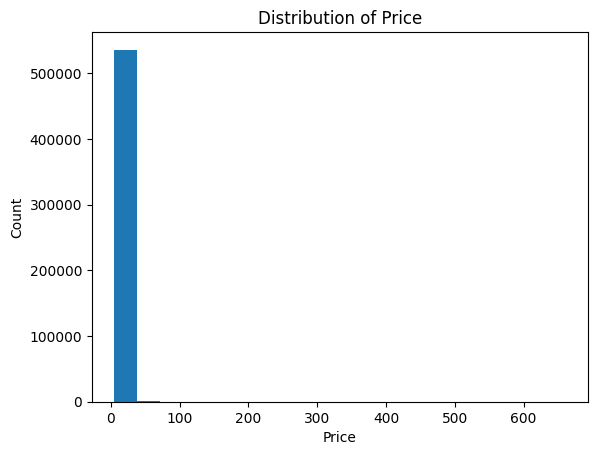

In [12]:
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

In [13]:
# All positive values that are more than 5000
df[df['Price']>50]["Price"].count()/df.shape[0]*100

0.08054442062086324

As the percentage of positive values greater than 50 is less than 1%, we can take a look of the distribution of values whithin (0, 50).

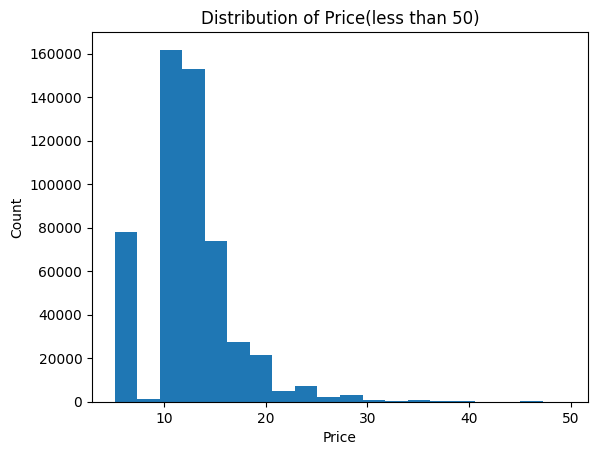

In [14]:
plt.hist(df[df['Price']<50]['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price(less than 50)')
plt.show()

# 7. If skewed, perform suitable transformations on these numerical variables. 
Check the relationship of each of these numeric variables with the target variable using bar charts.  Visualize the relationship between each of these numeric variables and the target variable. Also, comment on the presence of outliers on each variable.


As we analyzed before, we now take a look with quantity of 0-100 and price less than 50.

In [15]:
df_new = df[(df['Quantity'] >= 0) & (df['Quantity'] <= 100)&(df['Price']<=50)]

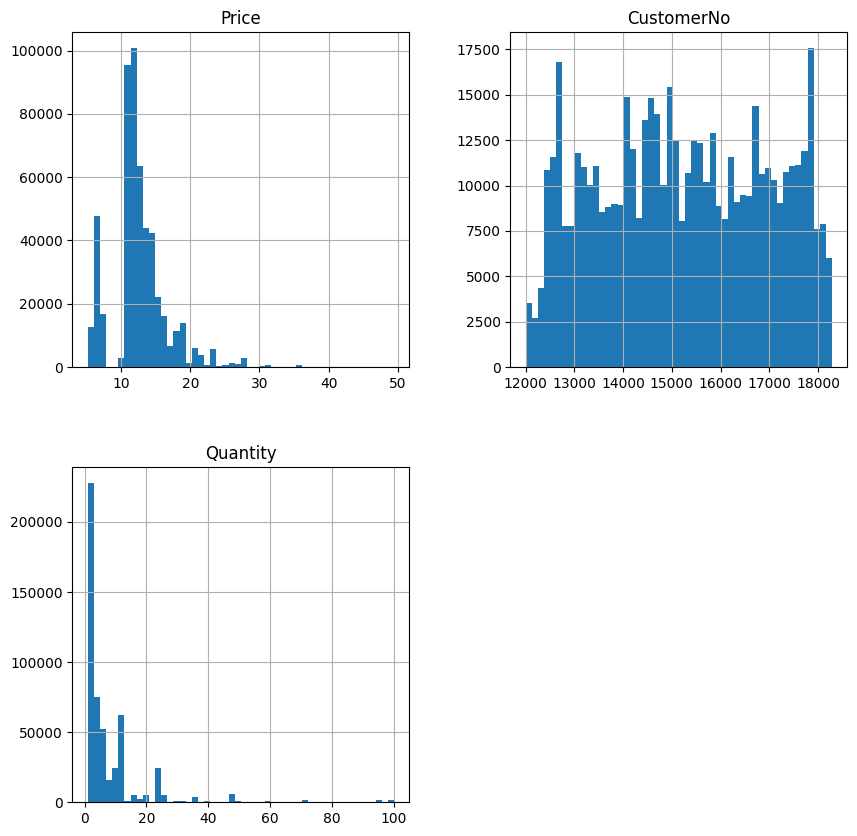

In [16]:
num_vars = ['Price', 'CustomerNo', 'Quantity']
df_new[num_vars].hist(bins=50, figsize=(10,10))
plt.show()

<ipython-input-17-5c5fdc82c3c9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_new.corr()


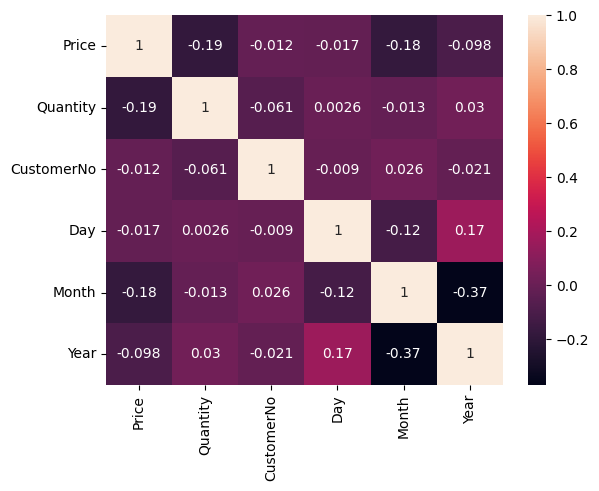

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# 8. Check cardinality and rare values of at least two categorical features. 
Discuss whether each of them is ordinal or nominal.


<Axes: >

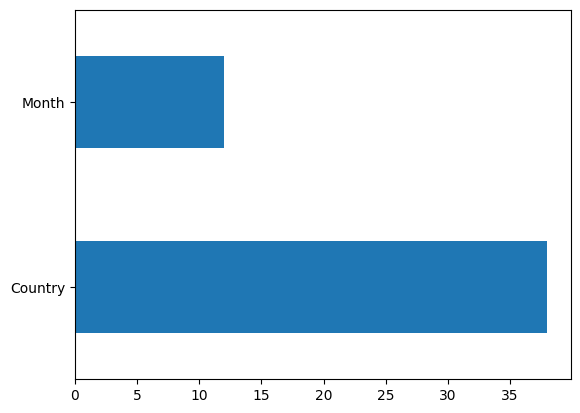

In [18]:
# Cardinality
cat_vars=['Country', 'Month']
df_new[cat_vars].nunique().sort_values(ascending=False).plot.barh()

In [19]:
def analyse_rare_labels(data, var, rare_perc):
    data = data.copy()

    # determine the % of observations per category
    data_temp = data.groupby(var)['Quantity'].count() / len(df)

    # return categories that are rare
    return data_temp[data_temp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_vars:
    print(analyse_rare_labels(df_new, var, 0.01))
    print("---"* 50)

Country
Australia               0.002569
Austria                 0.001639
Bahrain                 0.000032
Belgium                 0.004659
Brazil                  0.000058
Canada                  0.000276
Channel Islands         0.001147
Cyprus                  0.001055
Czech Republic          0.000045
Denmark                 0.000750
European Community      0.000106
Finland                 0.001259
Greece                  0.000125
Hong Kong               0.000285
Iceland                 0.001465
Israel                  0.000664
Italy                   0.001158
Japan                   0.000574
Lebanon                 0.000084
Lithuania               0.000063
Malta                   0.000252
Netherlands             0.003253
Norway                  0.001708
Poland                  0.000321
Portugal                0.003418
RSA                     0.000106
Saudi Arabia            0.000017
Singapore               0.000395
Spain                   0.004430
Sweden                  0.000557
Sw

We checked "month" and "country". "month" is a ordinal categorical variable and "country" is a nominal.

# 9. FEATURE ENGINEERING
Generate at least one text based feature from the Product Name column (eg - length of the text, no of words).


In [20]:
df['Product_Name_Length'] = df['ProductName'].apply(len)

In [21]:
df.head()

,TransactionNo,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Day,Month,Year,Product_Name_Length
0,581482,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,9,12,2019,29
1,581475,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,9,12,2019,35
2,581475,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,9,12,2019,24
3,581475,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,9,12,2019,33
4,581475,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,9,12,2019,33


We created a column of "Product_Name_Length".

# 10. Handle NaNs. 
State in your notebook how you dealt with the NaN values with a justification backing the approach taken to deal with NaNs.


In [22]:
# missing values
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
# check the proportion of missingness using "mean" on isnull()
df[vars_with_na].isnull().mean()

CustomerNo    0.000103
dtype: float64

We can drop NAs.

In [23]:
df = df.dropna()

# 11. Develop an ML model to predict the quantity sold.


In [55]:
df_ml = df[(df['Quantity'] >= 0) & (df['Quantity'] <= 100)&(df['Price']<=50)].drop(columns=["ProductName","TransactionNo","ProductNo"])

First, we dropped the outliers. Based on the analysis before, we can build pipeline with preprocessor to deal with the skewed data.

In [56]:
from sklearn.model_selection import train_test_split
X = df_ml.drop(columns = ['Quantity'])
y = df_ml['Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((418021, 7), (418021,), (104506, 7), (104506,))

In [57]:
df_ml.head()

,Price,Quantity,CustomerNo,Country,Day,Month,Year,Product_Name_Length
0,21.47,12,17490.0,United Kingdom,9,12,2019,29
1,10.65,36,13069.0,United Kingdom,9,12,2019,35
2,11.53,12,13069.0,United Kingdom,9,12,2019,24
3,10.65,12,13069.0,United Kingdom,9,12,2019,33
4,11.94,6,13069.0,United Kingdom,9,12,2019,33


In [58]:
cat_vars=['CustomerNo', 'Country', 'Day', 'Month', 'Year', 'Product_Name_Length']
num_vars=['Price']

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Define the preprocessor for the categorical column
cat_preprocessor = OneHotEncoder(handle_unknown='ignore')
# Define the preprocessor for the numerical columns
num_preprocessor = StandardScaler()
# Combine the preprocessors using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num_preprocessor', num_preprocessor, num_vars),
    ('cat_preprocessor', cat_preprocessor,cat_vars)
])

In [60]:
from sklearn.linear_model import LinearRegression
pipeline = Pipeline(steps = [
    ("pre", preprocessor),  
    ("linear", LinearRegression())
    ])

In [61]:
pipeline.fit(X = X_train, y = y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  StandardScaler(), ['Price']),
                                                 ('cat_preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CustomerNo', 'Country',
                                                   'Day', 'Month', 'Year',
                                                   'Product_Name_Length'])])),
                ('linear', LinearRegression())])

In [62]:
test_pred = pipeline.predict(X_test)

# 11. Report model performance on test data


In [64]:
from dmba import regressionSummary
# Model performance on Test data 
print("Linear Regression Model Performance on Test data")
regressionSummary(y_test, test_pred)

Linear Regression Model Performance on Test data

Regression statistics

                      Mean Error (ME) : 0.0223
       Root Mean Squared Error (RMSE) : 9.8335
            Mean Absolute Error (MAE) : 5.3440
          Mean Percentage Error (MPE) : -99.9022
Mean Absolute Percentage Error (MAPE) : 154.8157
